In [1]:
import numpy as np # mathematical operations and algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # Fancier visualizations
sns.set(color_codes=True)
import statistics as stats # fundamental stats package
import matplotlib.pyplot as plt # visualization library
%matplotlib inline
import os
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import jaccard_score
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [3]:
col_names = ['No','year','month','day','hour','PM2.5','PM10','SO2', 'NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM','station']
Wanshouxigong = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv') 
Wanliu = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv') 
Tiantan = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv') 
Shunyi = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv') 
Nongzhanguan = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv') 
Huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv') 
Gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv') 
Aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv') 
Changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv') 
Dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv') 
Guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv') 

In [4]:
print(Wanshouxigong.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35

In [5]:
print(Wanshouxigong.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


In [6]:
Wanshouxigong.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [7]:
Wanshouxigong['SO2'].unique

<bound method Series.unique of 0        6.0
1        7.0
2        NaN
3        3.0
4        3.0
        ... 
35059    3.0
35060    3.0
35061    4.0
35062    4.0
35063    4.0
Name: SO2, Length: 35064, dtype: float64>

In [8]:
Wanshouxigong['SO2'] = Wanshouxigong['SO2'].astype(float)

In [9]:
Wanshouxigong['SO2'].mean()

17.148603110917286

In [10]:
def clean_and_transform(dataset):
    # drop unnecessary attributes from dataset
    #dataset= dataset.drop(['No','wd','RAIN','PRES','DEWP','WSPM'], axis=1)
    # fill missing values via linear interpolation
    dataset = dataset.interpolate(method='linear')
    dataset.fillna(method='ffill')
    # aggregate date into useable format
    dataset['aggregate-date'] = dataset[['year','month','day','hour']].apply(lambda x : '{}+{}+{}+{}'.format(x[0],x[1],x[2],x[3]), axis=1)
    return dataset
     

In [11]:
def aggregate_datasets(array_of_datasets):
    temp_array = array_of_datasets[0]
    for i in range(1,len(array_of_datasets)):
        temp_array = pd.concat([temp_array, array_of_datasets[i]]).groupby('aggregate-date').mean()
    final_array = pd.DataFrame(temp_array)
    bl = [0,1,2,3,4,5,6,7,8,9]
    final_array['label'] = pd.qcut(final_array['TEMP'], q=10, labels=bl)
    return final_array

In [12]:
#Clean and Transforming data at all stations
Wanshouxigong = clean_and_transform(Wanshouxigong)
Wanliu = clean_and_transform(Wanliu)
Tiantan = clean_and_transform(Tiantan)
Shunyi = clean_and_transform(Shunyi)
Nongzhanguan = clean_and_transform(Nongzhanguan)
Huairou = clean_and_transform(Huairou)
Gucheng = clean_and_transform(Gucheng)
Aotizhongxin = clean_and_transform(Aotizhongxin)
Changping = clean_and_transform(Changping)
Dingling = clean_and_transform(Dingling)
Dongsi = clean_and_transform(Dongsi)
Guanyuan = clean_and_transform(Guanyuan)

In [13]:
# Grouping all stations together
all_stations = [Aotizhongxin, Dongsi, Guanyuan, Gucheng, Nongzhanguan, Tiantan, Wanliu, Wanshouxigong, Huairou, Dingling, Changping, Shunyi]
AllStations = aggregate_datasets(all_stations)

In [14]:
def linear_regression_func(attribute):
    x_vars= AllStations[[attribute]]
    y_vars=AllStations[['TEMP']]
    x = np.array(x_vars.values.tolist())
    y = np.array(y_vars.values.tolist())
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    plt.scatter(x, y, color='blue', s=1)
    plt.plot(x, y_pred, color='red')
    plt.xlabel(attribute)
    plt.ylabel("Temperature")
    plt.title(attribute + " effect on temperature")
    plt.show()
    # intercept 
    intercept = model.intercept_
    # the slope
    slope = model.coef_
    # correlation coef
    corr_coef = model.score(x, y)
    corr_coef = math.sqrt(corr_coef)
    print("Y = %5.2f X + %5.2f" %(slope,intercept))
    print('Correlation Coefficient :',  corr_coef)
    print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(y_vars,y_pred))))


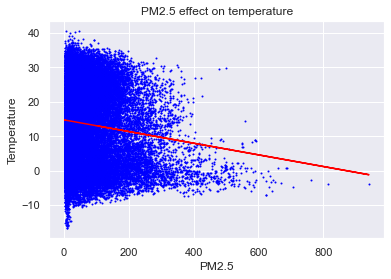

Y = -0.02 X + 14.72
Correlation Coefficient : 0.12010168521075691
Root Mean Squared Error: 11.40161763774596


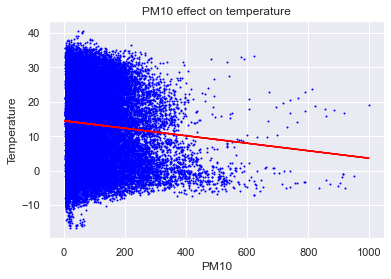

Y = -0.01 X + 14.45
Correlation Coefficient : 0.0857369949791551
Root Mean Squared Error: 11.44245980755564


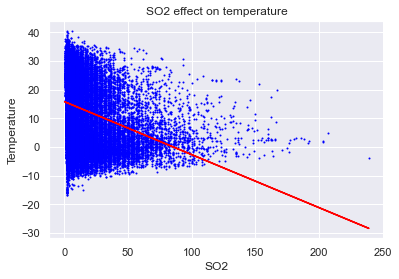

Y = -0.19 X + 15.87
Correlation Coefficient : 0.31403955788578775
Root Mean Squared Error: 10.903734289410957


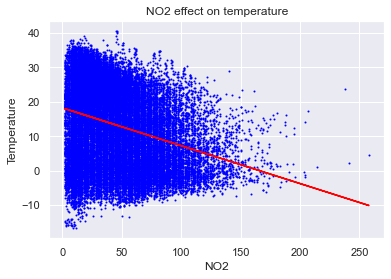

Y = -0.11 X + 18.22
Correlation Coefficient : 0.2959623871106731
Root Mean Squared Error: 10.97022749034846


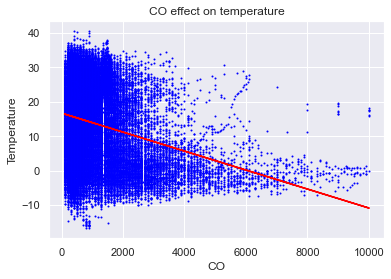

Y = -0.00 X + 16.68
Correlation Coefficient : 0.27910644974260757
Root Mean Squared Error: 11.028346902574569


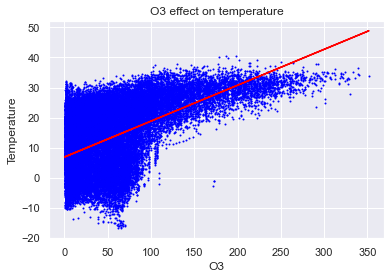

Y =  0.12 X +  6.91
Correlation Coefficient : 0.5668816623811003
Root Mean Squared Error: 9.461127364797536


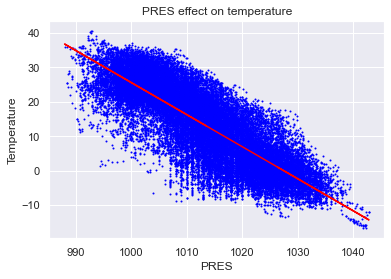

Y = -0.93 X + 957.51
Correlation Coefficient : 0.8258589889858997
Root Mean Squared Error: 6.475982283290515


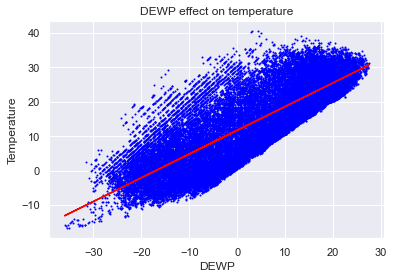

Y =  0.69 X + 11.69
Correlation Coefficient : 0.8239593325509583
Root Mean Squared Error: 6.50782075955111


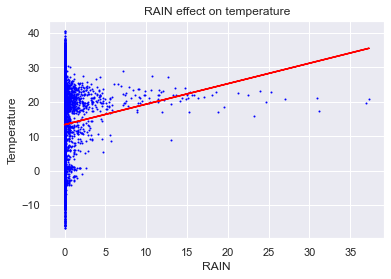

Y =  0.59 X + 13.34
Correlation Coefficient : 0.03938204316014964
Root Mean Squared Error: 11.475839332826254


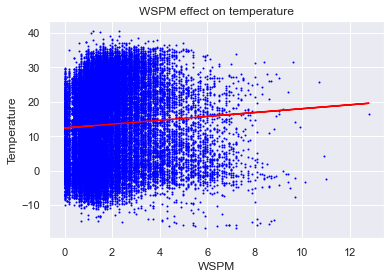

Y =  0.56 X + 12.36
Correlation Coefficient : 0.06290966069302667
Root Mean Squared Error: 11.462000200483178


In [15]:
#Performing linear regression on all the explanatory variables
linear_regression_func('PM2.5')
linear_regression_func('PM10')
linear_regression_func('SO2')
linear_regression_func('NO2')
linear_regression_func('CO')
linear_regression_func('O3')
linear_regression_func('PRES')
linear_regression_func('DEWP')
linear_regression_func('RAIN')
linear_regression_func('WSPM')



In [16]:
AllStations[['PM2.5','PM10','SO2','NO2','CO','O3','PRES','DEWP','RAIN','WSPM','TEMP']].corr()


,PM2.5,PM10,SO2,NO2,CO,O3,PRES,DEWP,RAIN,WSPM,TEMP
PM2.5,1.000000,0.889705,0.461935,0.635951,0.776079,-0.126368,0.002149,0.118777,-0.008090,-0.268076,-0.120102
PM10,0.889705,1.000000,0.462236,0.640850,0.696424,-0.107019,-0.029982,0.082564,-0.023373,-0.189076,-0.085737
SO2,0.461935,0.462236,1.000000,0.505000,0.502439,-0.138480,0.217523,-0.262214,-0.038928,-0.122205,-0.314040
NO2,0.635951,0.640850,0.505000,1.000000,0.653669,-0.413245,0.149024,-0.080150,-0.051217,-0.382243,-0.295962
CO,0.776079,0.696424,0.502439,0.653669,1.000000,-0.244020,0.133241,-0.020542,-0.003677,-0.285803,-0.279106
O3,-0.126368,-0.107019,-0.138480,-0.413245,-0.244020,1.000000,-0.418559,0.286705,0.023954,0.309847,0.566882
PRES,0.002149,-0.029982,0.217523,0.149024,0.133241,-0.418559,1.000000,-0.762659,-0.063945,0.016784,-0.825859
DEWP,0.118777,0.082564,-0.262214,-0.080150,-0.020542,0.286705,-0.762659,1.000000,0.087417,-0.256374,0.823959
RAIN,-0.008090,-0.023373,-0.038928,-0.051217,-0.003677,0.023954,-0.063945,0.087417,1.000000,0.028889,0.039382
WSPM,-0.268076,-0.189076,-0.122205,-0.382243,-0.285803,0.309847,0.016784,-0.256374,0.028889,1.000000,0.062910


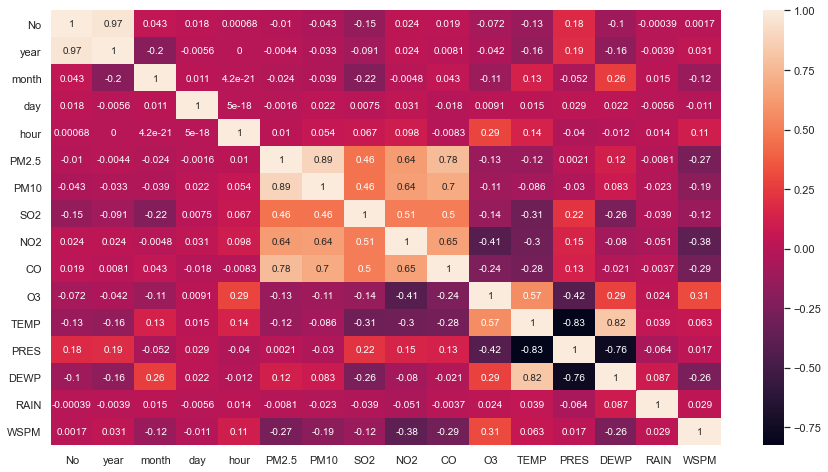

In [17]:
#doing EDAs

corrdata = AllStations.corr()
corrdata.style

ax, fig = plt.subplots(figsize=(15, 8))
plt.show(sns.heatmap(corrdata, annot=True))



In [18]:
X = AllStations[['PM2.5','PM10','SO2', 'NO2','CO','O3']]
y = AllStations['label']
X, y = X[1:], y[1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [19]:
print("=============Using KNN on the DATASET=================")

knn = KNeighborsClassifier(n_neighbors =3, metric ='jaccard')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

=============Using KNN on the DATASET=================


In [20]:
print("========Accuracy of The KNN Model using score accuracy with Ks from 1-8 =============")

score=[]

for i in range(1,12):


    knn=KNeighborsClassifier(n_neighbors=i,metric='jaccard')
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    ans=accuracy_score(pred,y_test)
    score.append(round(100*ans, 2))

print(pred)
print("The accuracy of K=1-8 is shown here: ", sorted(score,reverse=True))


print("=============Confusion Matrix (KNN) on the DATASET=================")


print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction)
fig = plt.figure()


========Accuracy of The KNN Model using score accuracy with Ks from 1-8 =============
[6 6 6 ... 6 6 6]
The accuracy of K=1-8 is shown here:  [10.45, 10.45, 10.45, 10.45, 10.45, 10.45, 10.45, 10.45, 10.45, 9.81, 9.81]
=============Confusion Matrix (KNN) on the DATASET=================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1101
           1       0.00      0.00      0.00      1086
           2       0.00      0.00      0.00      1028
           3       0.00      0.00      0.00      1003
           4       0.00      0.00      0.00      1033
           5       0.00      0.00      0.00      1032
           6       0.10      1.00      0.19      1099
           7       0.00      0.00      0.00      1013
           8       0.00      0.00      0.00      1062
           9       0.00      0.00      0.00      1062

    accuracy                           0.10     10519
   macro avg       0.01      0.10      0.02     10519
weighted a

/Users/ozgurtarim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

In [21]:
data_inputs = AllStations[['PM2.5','PM10','SO2', 'NO2','CO','O3']].values
data_targets = AllStations['label'].values



(data_train, data_test, data_train_target, data_test_target) = train_test_split(data_inputs, data_targets, test_size=0.4, random_state=1)

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#cols_without_age = list(X_train.columns[:])
#cols_without_age.remove('PM10')
clf = clf.fit(X_train, y_train)

In [23]:
feature_cols = ['PM2.5','PM10','SO2', 'NO2','CO','O3']
X = AllStations[feature_cols]
y = AllStations['label']

In [24]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

from io import StringIO
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('test.png')
#Image(graph.create_png())
#dot_data

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred)


0.30202490731058085

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.741117 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.741117 to fit



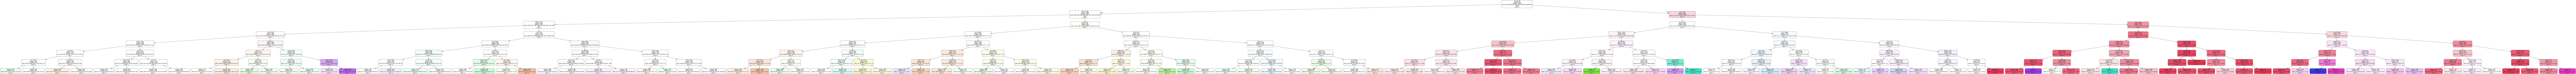

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('smalltree.png')
Image(graph.create_png())

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[   0    0    0    0    0    0 1101    0    0    0]
 [   0    0    0    0    0    0 1086    0    0    0]
 [   0    0    0    0    0    0 1028    0    0    0]
 [   0    0    0    0    0    0 1003    0    0    0]
 [   0    0    0    0    0    0 1033    0    0    0]
 [   0    0    0    0    0    0 1032    0    0    0]
 [   0    0    0    0    0    0 1099    0    0    0]
 [   0    0    0    0    0    0 1013    0    0    0]
 [   0    0    0    0    0    0 1062    0    0    0]
 [   0    0    0    0    0    0 1062    0    0    0]]


In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy : %.2f"%(accuracy_score(y_test, pred)*100))

Accuracy : 10.45
